## Introduction:

The project centers around two major North American cities across two countries namely New York (USA) and Toronto (Canada). The purpose of this Project is to help people in exploring better facilities around their neighborhood. It will also help people making smart and efficient decision on selecting a good neighborhood among many others.

There are often scenarios when people migrate from New-York to Toronto or vice-versa for job or in search of better opportunity/livelihood. Most of us while migrating to a new neighborhood are unaware of it’s pros and cons. Thus choosing abest neighborhood based on our liking becomes extremely difficult. Moreover each individual have their own preference, like for example one like to have a fresh cup of coffee before going to work and have food on the way while coming back home. So he/she will be interested to stay near certain place where both coffee and restaurant are in close proximity.. Whereas others might be interested to go for walk in park in the morning or Yoga sessions, so they will look for neighorhoods which have parks and yoga centers nearby.


## Problem Statement:

There are various components which makes a neighborhood, like park, hospitals, restaurants, movie theaters, community halls etc. Any communities will have them, but each person will have their own preferences. In this project we will group various neighborhoods based on Top 10 venues within 700 meters of that neighborhood. Using this we will be grouping neighborhoods and the top venues available around them.

This Project aim to create an analysis of features for a people migrating from Toronto to New York so that it will be easy for an individual to pick a neighborhood based on his personal preferences. It will also help people to get awareness of the area and neighborhood before moving to a new city, state, country or place for their work or to start a new fresh life.

## Data Description:

We require geographical location data for both NewYork and Toronto. Postal codes, Borough and Neighborhood in each city serve as a starting point. Using the city we can find the latitude and longitude information for that particular city. Once we have the coordinates we use the same to get the venues nearby and subsequently sorting them on Top 10 venues.

### Toronto:
To derive our solution, We scrape our data from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M.
This wikipedia page has information about all the neighbourhoods, we limit it for Toronto.
1.	PostalCode : Postal code (Alphanumeric Number)
2.	Borough:  Name of the Borough
3.	Neigborhood: The neighborhood in the Borough. In one Borough there might be multiple neighborhoods, so they are separated by comma (,)

This wikipedia page lacks information about the geographical locations. To solve this we use another weblink having the coordinates of each postal code.
https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv

### New York:
To derive our solution, We leverage JSON data available at. https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json

The JSON file has data about all the neighborhoods in New York. We limit our data for only the following columns:
1.	Borough: Name of the Borough
2.	Neighborhood: Name of the neighborhood in the Borough.
3.	Latitude: Latitude of the neighborhood
4.	Longitude: Longitude of the neighborhood


### Foursquare API Data
We will need data about different venues in different neighbourhoods of that specific neighborhood. In order to gain that information we will use "Foursquare" location information. Foursquare is a location data provider with information about all manner of venues and events within an area of interest. Such information includes venue names, locations, menus and even photos. As such, the foursquare location platform will be used as the sole data source since all the stated required information can be obtained through the API.

After finding the list of neighbourhoods, we then connect to the Foursquare API to gather information about venues inside each and every neighbourhood. For each neighbourhood, we have chosen the radius to be 700 meters.

The data retrieved from Foursquare contained information of venues within a specified distance of the longitude and latitude of the postcodes. The information obtained per venue as follows:
1.	Neighbourhood : Name of the Neighbourhood
2.	Neighbourhood Latitude : Latitude of the Neighbourhood
3.	Neighbourhood Longitude : Longitude of the Neighbourhood
4.	Venue : Name of the Venue
5.	Venue Latitude : Latitude of Venue
6.	Venue Longitude : Longitude of Venue
7.	Venue Category : Category of Venue

Based on all the information collected for both Toronto and New York, we have sufficient data to build our model. We cluster the neighbourhoods together based on similar venue categories. We then present our observations and findings. Using this data, our stakeholders can take the necessary decision to finding a best neighborhood which suites their needs.


## Methodology:
We will be creating our model with the help of Python so we start off by importing all the required packages

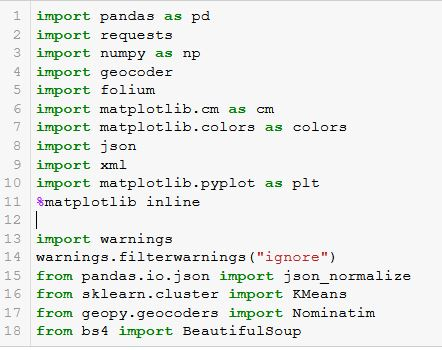

1. Pandas: For creating and manipulating dataframes.
2. Folium: Python visualization library would be used to visualize the neighborhoods cluster distribution of using interactive leaflet map.
3. Scikit Learn: For importing k-means clustering.
4. JSON: Library to handle JSON files.
5. XML: To separate data from presentation and XML stores data in plain text format.
6. Geocoder: To retrieve Location Data.
7. Beautiful Soup and Requests: To scrap and library to handle http requests.
8. Matplotlib: Python Plotting Module.

**The approach taken here is to explore each of the cities individually, plot the map to show the neighbourhoods being considered and then build our model by clustering all of the similar neighbourhoods together and finally plot the new map with the clustered neighbourhoods. We draw insights and then compare and discuss our findings**


## Data Collection:
In the data collection stage, we begin with collecting the required data for the cities of New York and Toronto. We need data that has the postal codes, neighbourhoods and boroughs specific to each of the cities.

To collect data for Toronto, we scrape the List of areas of wikipedia page using BeautifulSoup, using the following code:

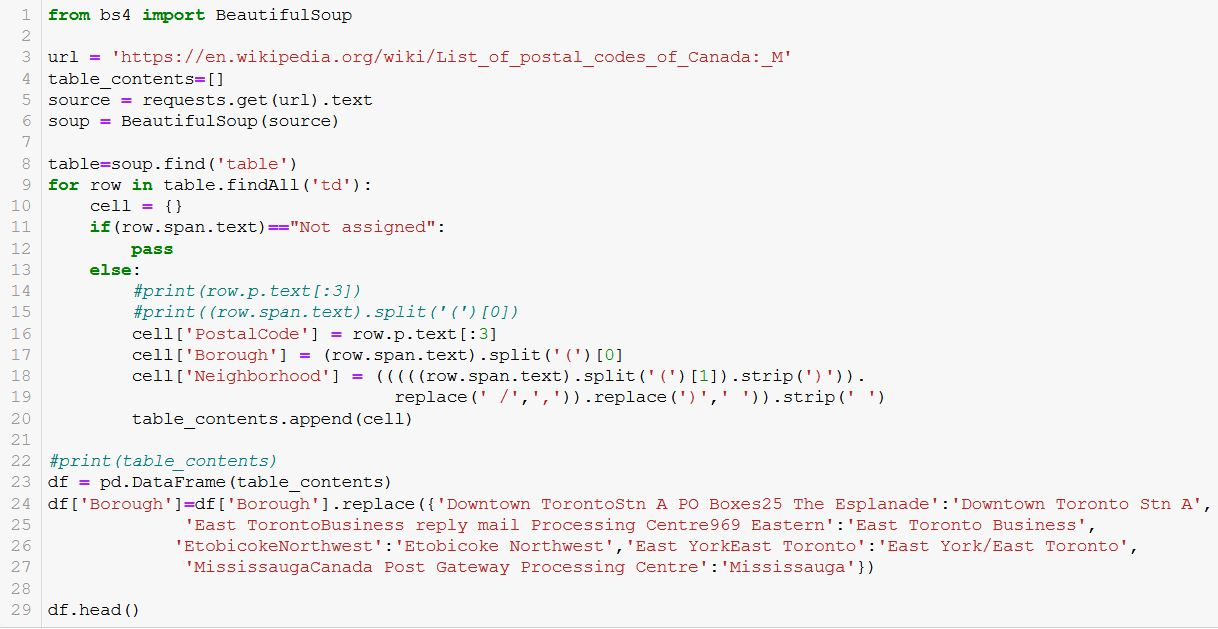


The data from the website looks as: 
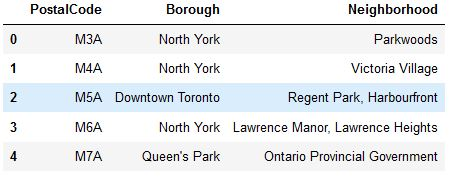

For New York we have the data available using a json file. we used the below lines of code to import the data.

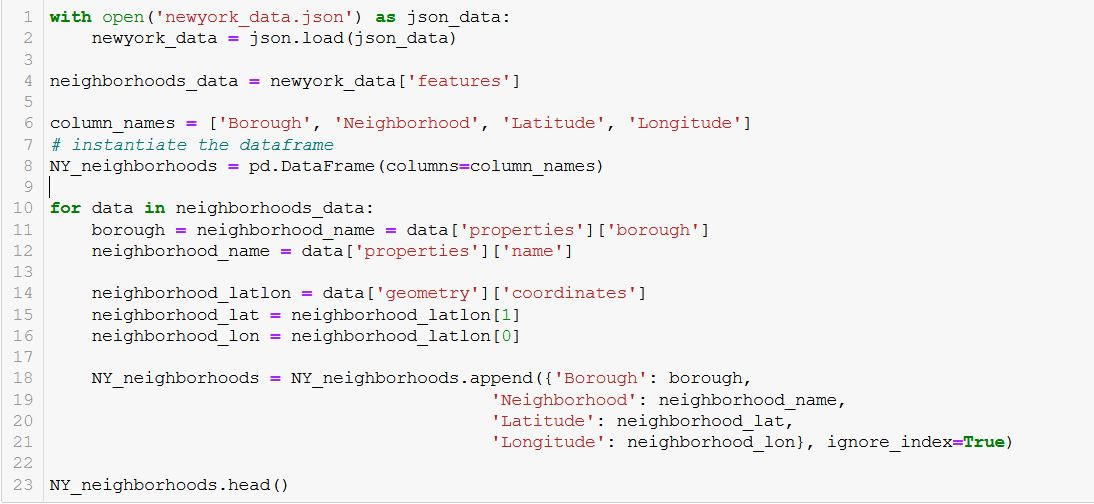

The imported data loks like this:
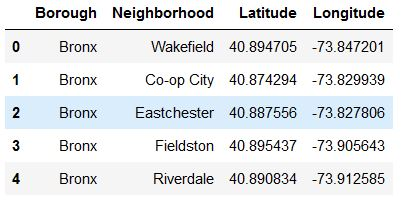

## Data Preprocessing:
In case of Toronto the data in the wiki page was having the "Neighborhood" information clubbed together with the "Borough" information enclosed in Brackets (). Multiple neighborhoods are seperated using '/'. 
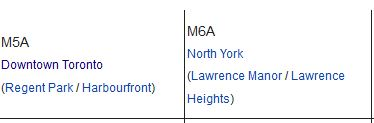

the '/' is replaced by ',' to seperate multiple neighborhoods, and also the correct Borough and neighborhood informtaion is also extracted by splitting the data based on the brackets '(' using the below lines of code.

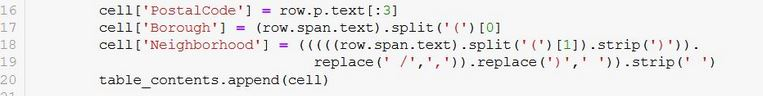

For New York if any Borough have no information then the same is overidden with the neighborhood name.

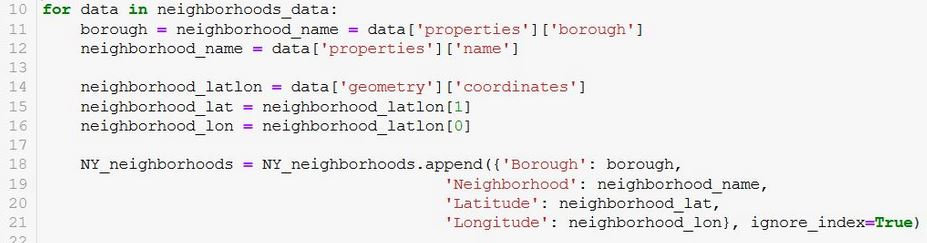

## Feature Selection
For both of our datasets, we need only the borough, neighbourhood, postal codes and geolocations (latitude and longitude). 
For Toronto we combine latitude information DataFrame along with the neigborhood Data Frame

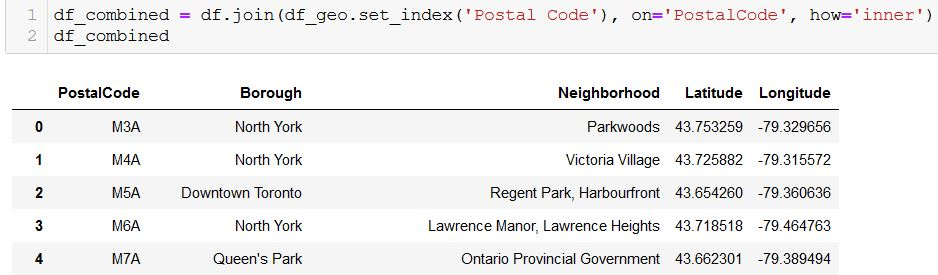

## Visualizing the Neighbourhoods of Toronto and NewYork

The latitude and longitude information of any location can be fetched using geolocator as:
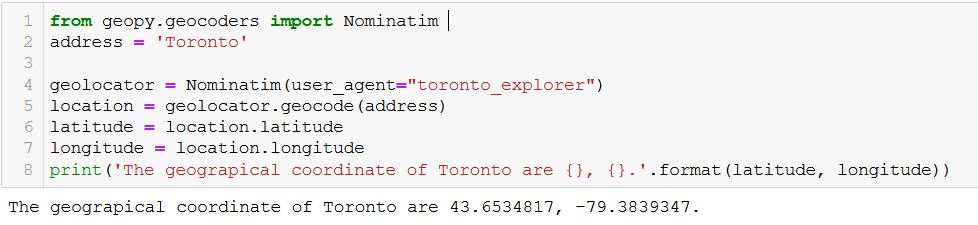

Now that our datasets are ready, using the Folium package, we can visualize the maps of Toronto and New York with the neighbourhoods information marked in them.

**Neighborhood of Toronto**

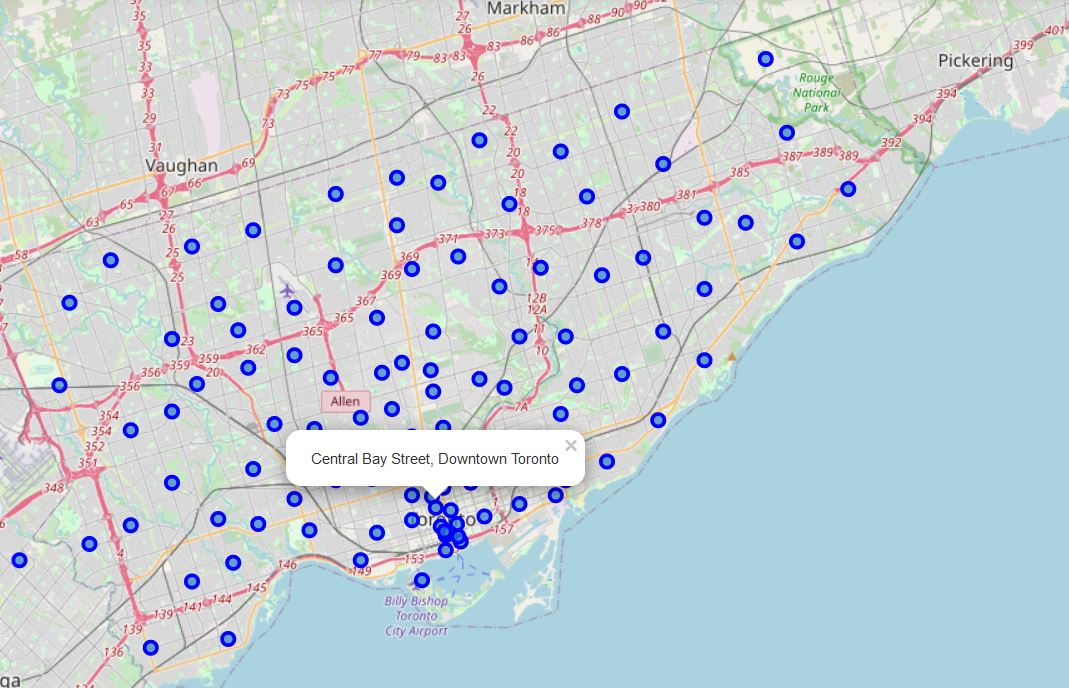

**Neigborhood of New York:**

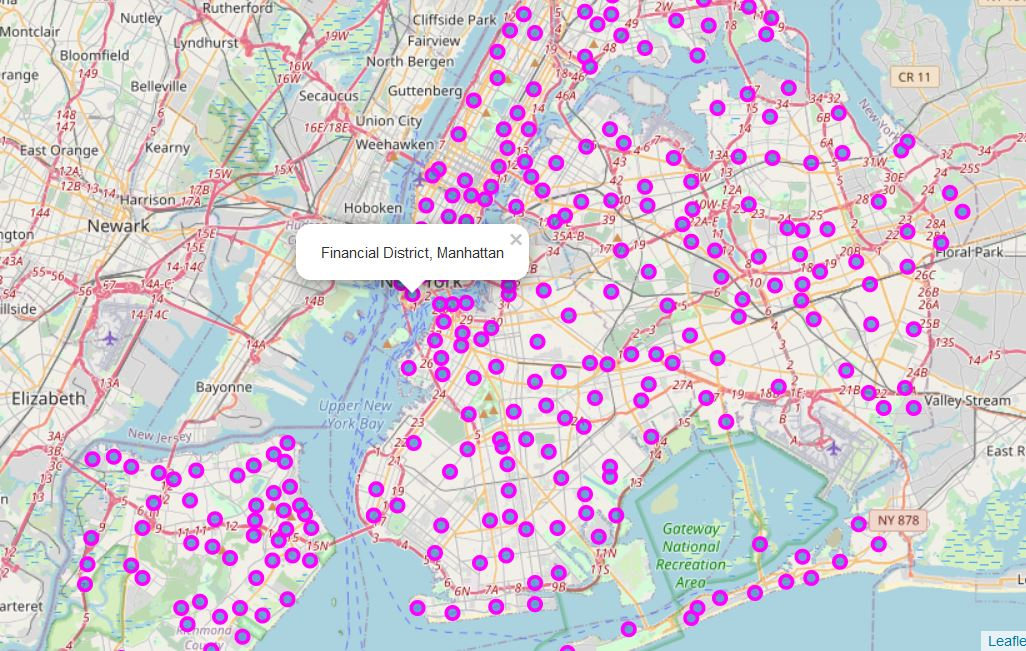

## Feature Engineering
Both our data set contains the required information [Borough, neighborhood, Latitude, Longitude]. 